In [15]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/breast_cancer_wisconsin.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
df = df.drop(columns=['Unnamed: 32'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
# Manejar valores atípicos (usando IQR para detección)
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):  # Verificar si la columna es numérica
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Imprimir el DataFrame actualizado
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
40,855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,15.93,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146
48,857155,B,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,...,13.76,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301
49,857156,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917
50,857343,B,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,...,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
51,857373,B,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,...,14.67,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Separar características (X) y variable objetivo (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ahora X_train y X_test contienen los datos normalizados
# y_train y y_test contienen las etiquetas correspondientes

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Crea un objeto LabelEncoder
encoder = LabelEncoder()

# Ajusta el encoder a tus etiquetas y transforma y_train e y_test
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Define el modelo MLP
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],))) # Capa oculta con 32 neuronas y función de activación ReLU
model.add(Dense(1, activation='sigmoid')) # Capa de salida con 1 neurona y función de activación sigmoide

# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Ajusta epochs y batch_size según sea necesario


#Evalua el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.0192 - loss: 0.9160 - val_accuracy: 0.0000e+00 - val_loss: 0.8253
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0419 - loss: 0.8362 - val_accuracy: 0.2353 - val_loss: 0.7447
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1751 - loss: 0.7574 - val_accuracy: 0.6471 - val_loss: 0.6694
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4959 - loss: 0.6855 - val_accuracy: 0.9412 - val_loss: 0.5985
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9659 - loss: 0.6128 - val_accuracy: 1.0000 - val_loss: 0.5331
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9808 - loss: 0.5574 - val_accuracy: 1.0000 - val_loss: 0.4732
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9808 - loss: 0.5034 - val_accuracy: 1.0000 - val_loss: 0.4188
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9808 - loss: 0.4494 - val_accuracy: 1.0000 - val_loss: 0.3702
Epoch 

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9616 - loss: 0.5712 - val_accuracy: 1.0000 - val_loss: 0.4928
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9694 - loss: 0.5015 - val_accuracy: 1.0000 - val_loss: 0.4308
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9808 - loss: 0.4480 - val_accuracy: 1.0000 - val_loss: 0.3764
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9886 - loss: 0.3933 - val_accuracy: 1.0000 - val_loss: 0.3295
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9808 - loss: 0.3568 - val_accuracy: 1.0000 - val_loss: 0.2884
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9886 - loss: 0.3122 - val_accuracy: 1.0000 - val_loss: 0.2522
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9886 - loss: 0.2766 - val_accuracy: 1.0000 - val_loss: 0.2203
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9808 - loss: 0.2617 - val_accuracy: 1.0000 - val_loss: 0.1924

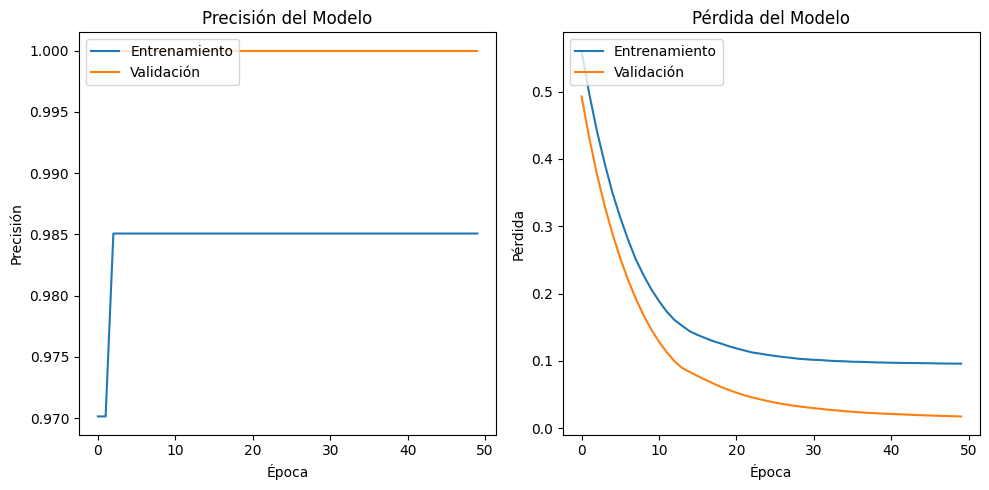

In [24]:
# Define el modelo MLP
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],))) # Capa oculta con 32 neuronas y función de activación ReLU
model.add(Dense(1, activation='sigmoid')) # Capa de salida con 1 neurona y función de activación sigmoide

# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo y guarda el historial
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

#Evalua el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

# Visualiza las curvas de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


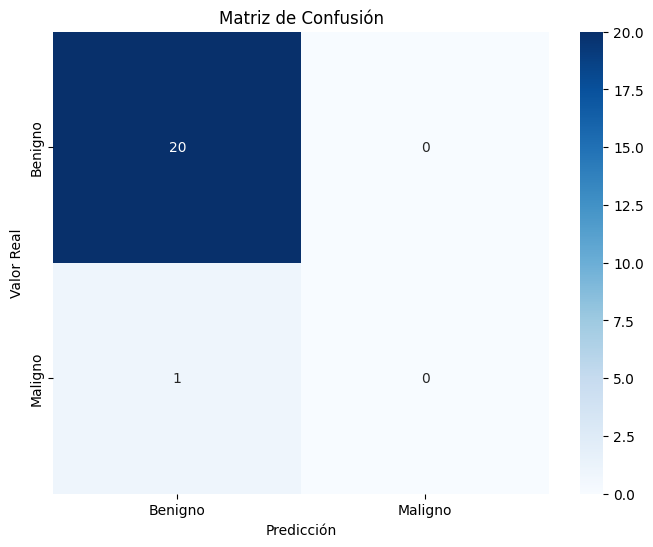

Discusión:
La red MLP básica muestra una precisión general alta (95%), sin embargo, la precisión y recall para la clase minoritaria (1, Maligno) son muy bajos, lo que indica un problema de desequilibrio de clases.  El F1-score, una medida armónica entre precisión y recall, también es bajo para la clase minoritaria. La matriz de confusión también confirma un rendimiento pobre en la predicción de la clase minoritaria.
Mejoras:
1. Técnicas de sobremuestreo o submuestreo para equilibrar las clases: SMOTE, RandomUnderSampler, o NearMiss.
2. Aumentar la complejidad del modelo: Agregar más capas ocultas, neuronas por capa, o usar diferentes funciones de activación.
3. Regularización: L1 o L2 para prevenir sobreajuste, dado el bajo número de muestras.
4. Optimizadores diferentes: Experimentar con optimizadores como AdamW o RMSprop.
5. Usar una métrica diferente al accuracy: El F1-score o la curva ROC-AUC son mejores para datasets desbalanceados.
6. Validación cruzada: Utilizar k-fold cross-val

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convertir probabilidades a clases (0 o 1)

# Calcula las métricas
print(classification_report(y_test, y_pred_classes))

# Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

print("Discusión:")
print("La red MLP básica muestra una precisión general alta (95%), sin embargo, la precisión y recall para la clase minoritaria (1, Maligno) son muy bajos, lo que indica un problema de desequilibrio de clases.  El F1-score, una medida armónica entre precisión y recall, también es bajo para la clase minoritaria. La matriz de confusión también confirma un rendimiento pobre en la predicción de la clase minoritaria.")
print("Mejoras:")
print("1. Técnicas de sobremuestreo o submuestreo para equilibrar las clases: SMOTE, RandomUnderSampler, o NearMiss.")
print("2. Aumentar la complejidad del modelo: Agregar más capas ocultas, neuronas por capa, o usar diferentes funciones de activación.")
print("3. Regularización: L1 o L2 para prevenir sobreajuste, dado el bajo número de muestras.")
print("4. Optimizadores diferentes: Experimentar con optimizadores como AdamW o RMSprop.")
print("5. Usar una métrica diferente al accuracy: El F1-score o la curva ROC-AUC son mejores para datasets desbalanceados.")
print("6. Validación cruzada: Utilizar k-fold cross-validation para obtener una mejor estimación del rendimiento general del modelo.")
print("7. Recolectar más datos de la clase minoritaria.")